In [15]:
import pandas as pd
from nixtla import NixtlaClient
import numpy as np
from datetime import datetime

In [2]:
# Read Data
df = pd.read_csv('/Volumes/Macintosh HD/AnalyticsVidhya/av-gt-food_demand_forecast/inst/extdata/train.csv')

In [16]:
# Get maximum & minimum weeks
max_week = df['week'].max()

week = pd.date_range(
    start=datetime(2022,1,3),
    periods=max_week,
    freq='W-MON'
)

pd_week = pd.DataFrame({'calendar_date':week, 'week':pd.RangeIndex(1,(max_week+1)).to_series()})

df_master = df.merge(pd_week, on='week')
df_master = df_master.drop(['week'], axis=1)

df_master

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,calendar_date
0,1379560,55,1885,136.83,152.29,0,0,177,2022-01-03
1,1466964,55,1993,136.83,135.83,0,0,270,2022-01-03
2,1346989,55,2539,134.86,135.86,0,0,189,2022-01-03
3,1338232,55,2139,339.50,437.53,0,0,54,2022-01-03
4,1448490,55,2631,243.50,242.50,0,0,40,2022-01-03
...,...,...,...,...,...,...,...,...,...
456543,1271326,61,1543,484.09,484.09,0,0,68,2024-10-07
456544,1062036,61,2304,482.09,482.09,0,0,42,2024-10-07
456545,1110849,61,2664,237.68,321.07,0,0,501,2024-10-07
456546,1147725,61,2569,243.50,313.34,0,0,729,2024-10-07


In [4]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-BMLzdE6eCpynj4IoTctTutxujAhphTL7dzPvhnj1zmxj3jGqyIamzqKPOjRWZ4g0qWbrhpVgQwBY1hvE'
)
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

# Check for one time series

In [17]:
df_one_item = df_master[(df_master['meal_id']==1885)&(df_master['center_id']==55)]
print(df_one_item.dtypes)

id                                int64
center_id                         int64
meal_id                           int64
checkout_price                  float64
base_price                      float64
emailer_for_promotion             int64
homepage_featured                 int64
num_orders                        int64
calendar_date            datetime64[ns]
dtype: object


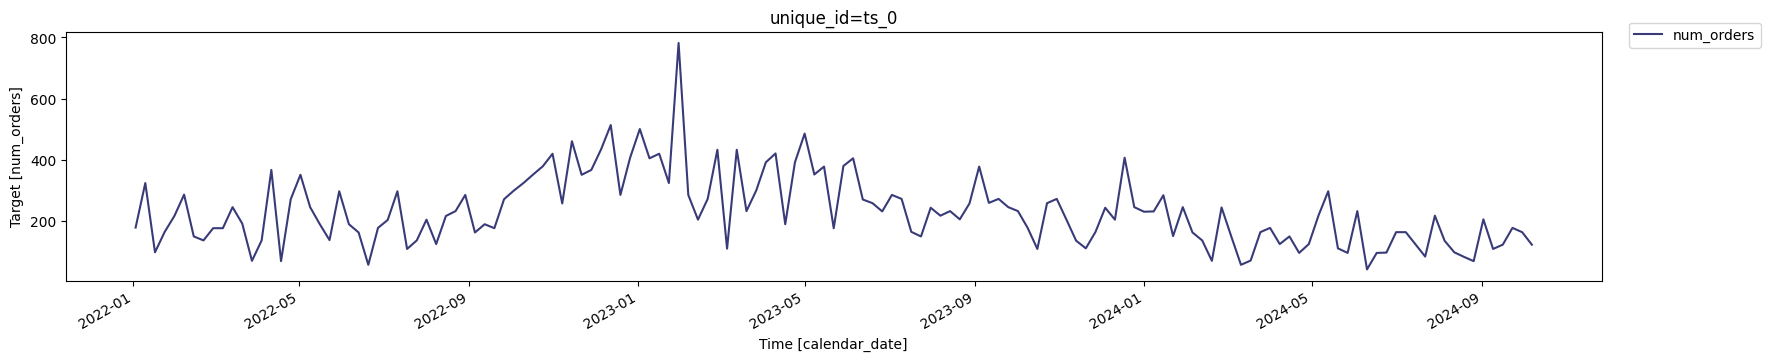

In [18]:
nixtla_client.plot(df_one_item, time_col='calendar_date', target_col='num_orders')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: W-MON
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


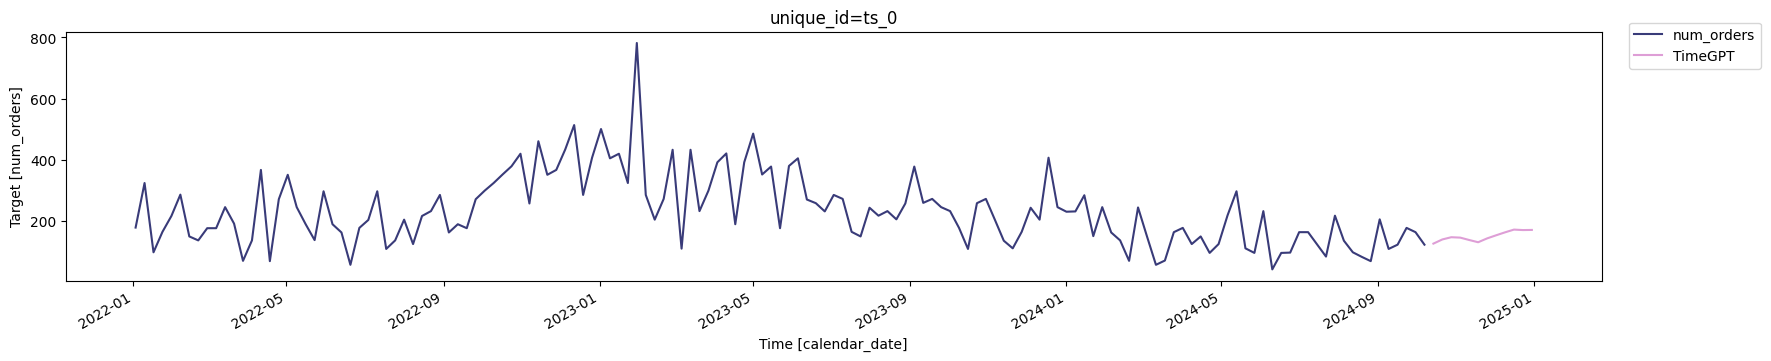

In [24]:
timegpt_fcst_df = nixtla_client.forecast(df=df_one_item, h=12, freq='W', time_col='calendar_date', target_col='num_orders')
nixtla_client.plot(df_one_item, timegpt_fcst_df, time_col='calendar_date', target_col='num_orders')